# Lending Club case Study


### Business Understanding:
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 

The data "loan.csv" contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

### Business Objectives:
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 


Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 


If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.


In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [1]:
#Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import hvplot.pandas

pd.set_option('display.max_columns',None)

In [2]:
#Load the data and check its shape, datatypes and information about each columns.

data=pd.read_csv('loan.csv')
print("************************************")
print("Shape of the loan.csv :", data.shape)
print("************************************")
print()
print("*************************************")
print("Datatypes of the dataframe 'data'")
print(data.dtypes)
print("*************************************")
print()
print("*************************************")
print("Info of the dataframe 'data'")
print(data.info())
print("*************************************")

************************************
Shape of the loan.csv : (39717, 111)
************************************

*************************************
Datatypes of the dataframe 'data'
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object
*************************************

*************************************
Info of the dataframe 'data'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
*************************************


In [3]:
data.head(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     B        B2       NaN  10+ years           RENT   
1   15.27%        59.83     C        C4     Ryder   < 1 year           RENT   
2   15.96%        84.33     C        C5       NaN  10+ years           RENT   

   annual_inc verification_status issue_d  loan_status pymnt_plan  \
0     24000.0            Verified  Dec-11   Fully Paid          n   
1     30000.0     Source Verified  Dec-11  Charged Off          n   
2     12252.0        Not Verified  Dec-11   Fully Paid          n   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   
1  https://lendingclub.com/browse/loanDetail.acti...   
2  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f        0.0            0.0  5863.155187          5833.84   
1                   f        0.0            0.0  1008.710000          1008.71   
2                   f        0.0            0.0  3005.666844          3005.67   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                 0.0        0.00   
1           456.46         435.17                 0.0      117.08   
2          2400.00         605.67                 0.0        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
0                     0.00       Jan-15           171.62          NaN   
1                     1.11       Apr-13           119.66          NaN   
2                     0.00       Jun-14           649.91          NaN   

  last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  \
0             May-16                         0.0                          NaN   
1             Sep-13                         0.0                          NaN   
2             May-16                         0.0                          NaN   

   policy_code application_type  annual_inc_joint  dti_joint  \
0            1       INDIVIDUAL               NaN        NaN   
1            1       INDIVIDUAL               NaN        NaN   
2            1       INDIVIDUAL               NaN        NaN   

   verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                        NaN               0           NaN          NaN   
1                        NaN               0           NaN          NaN   
2                        NaN              

In [4]:
#Are there any duplicated rows in the given dataset?

print("Number of duplicated rows:",data.duplicated().sum())

Number of duplicated rows: 0


In [5]:
print("Total count of NULL values in each row:")
data.isnull().sum()

Total count of NULL values in each row:


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### Observation:
It can be observed that there are many columns that are completely NULL. We can drop those columns.

In [6]:
#Define a function to calculate the percentage of NULL values present in each column

def null_per():
    return round(100*data.isnull().mean(),2)

null_per()

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [7]:
#Drop the columns whose percentage of NULL values are more than 50%

for i in data.columns:
    if round(100*data[i].isnull().mean(),2)>50.00:
        data=data.drop([i],axis=1)

In [8]:
null_per()

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [9]:
data.shape

(39717, 54)

In [10]:
data.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths      open_acc       pub_rec  \
count  39717.000000    39717.000000  39717.000000  39717.000000   
mean       0.146512        0.869200      9.294408      0.055065   
std        0.491812        1.070219      4.400282      0.237200   
min        0.000000        0.000000      2.000000      0.000000   
25%        0.000000        0.000000      6.000000      0.000000   
50%        0.000000        1.000000      9.000000      0.000000   
75%        0.000000        1.000000     12.000000      0.000000   
max       11.000000        8.000000     44.000000      4.000000   

           revol_bal     total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count   39717.000000  39717.000000  39717.000000   39717.000000  39717.000000   
mean    13382.528086     22.088828     51.227887      50.989768  12153.596544   
std     15885.016641     11.401709    375.172839     373.824457   9042.040766   
min         0.000000      2.000000      0.000000       0.000000      0.000000   
25%      3703.000000     13.000000      0.000000       0.000000   5576.930000   
50%      8850.000000     20.000000      0.000000       0.000000   9899.640319   
75%     17058.000000     29.000000      0.000000       0.000000  16534.433040   
max    149588.000000     90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     39717.000000     39717.000000   39717.000000        39717.000000   
mean      11567.149118      9793.348813    2263.663172            1.363015   
std        8942.672613      7065.522127    2608.111964            7.289979   
min           0.000000         0.000000       0.000000            0.000000   
25%        5112.310000      4600.000000     662.180000            0.000000   
50%        9287.150000      8000.000000    1348.910000            0.000000   
75%       15798.810000     13653.260000    2833.400000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000             39717.000000     39717.000000   
mean      95.221624                12.406112      2678.826162   
std      688.744771               148.671593      4447.136012   
min        0.000000                 0.000000         0.000000   
25%        0.000000                 0.000000       218.680000   
50%        0.000000                 0.000000       546.140000   
75%        0.000000                 0.000000      3293.160000   
max    29623.350000              7002.190000     36115.200000   

       collections_12_mths_ex_med  policy_code  acc_now_delinq  \
count                     39661.0      39717.0         39717.0   
mean                          0.0          1.0             0.0 

In [11]:
#Check the unique values present in few columns

cols=['tax_liens','chargeoff_within_12_mths','collections_12_mths_ex_med','pymnt_plan','application_type','policy_code',
      'acc_now_delinq','delinq_amnt','initial_list_status']

for col in cols:
    print("Unique values in column" +' '+col+':',data[col].unique())

Unique values in column tax_liens: [ 0. nan]
Unique values in column chargeoff_within_12_mths: [ 0. nan]
Unique values in column collections_12_mths_ex_med: [ 0. nan]
Unique values in column pymnt_plan: ['n']
Unique values in column application_type: ['INDIVIDUAL']
Unique values in column policy_code: [1]
Unique values in column acc_now_delinq: [0]
Unique values in column delinq_amnt: [0]
Unique values in column initial_list_status: ['f']


#### Observation:
1. From the above we can observe that columns in "cols" list have just 1 unique value. So we can drop all these columns.
2. Also from data.describe(), we can observe that few columns has most of values as '0' values. We can drop these columns as well 

In [12]:
data.drop(['tax_liens','chargeoff_within_12_mths','collections_12_mths_ex_med','desc','member_id','pymnt_plan','url',
          'application_type','policy_code','acc_now_delinq','delinq_amnt','initial_list_status','zip_code','earliest_cr_line',
           'inq_last_6mths','open_acc','total_acc','out_prncp','out_prncp_inv','total_rec_late_fee','recoveries','last_pymnt_d',
           'last_pymnt_amnt','last_credit_pull_d'],axis=1,inplace=True)

# Data Cleaning

1. emp_length : extract only the digit.
2. term : Strip the word 'months' from the data to get the 'term' as a number.
3. int_rate,revol_util : Remove the '%' symbol and convert to 'Float' datatype
4. issue_d : Convert the column to datatime format

In [13]:
data.emp_length=data.emp_length.str.extract('(\d+)')

data.term=data.term.str.rstrip('months')

data['int_rate']=data.int_rate.str.rstrip('%')
data.int_rate=data.int_rate.apply(lambda x : float(x))

data['revol_util']=data.revol_util.str.rstrip('%')
data.revol_util=data.revol_util.astype(float)

data.issue_d=pd.to_datetime(data.issue_d,format='%b-%y')


1. Assuming that the NULL values in the column emp_length are because the person has no employment history, fill the null values with '0'.
2. For the columns which has NULL values replace with the mode

In [14]:
#Replace the NULL values with '0'

data.emp_length.fillna(0,inplace=True)

In [15]:
#Replace the NULL values with 'mode'

for i in data.columns:
    data[i].fillna(data[i].mode()[0],inplace=True)
    
#Check the NULL value percentage
    
null_per()

id                         0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
title                      0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_rec_int              0.0
collection_recovery_fee    0.0
pub_rec_bankruptcies       0.0
dtype: float64

# Deriving new columns from the existing columns for Analysis

In [16]:
#Capture 'year' and 'month' from the 'issue_d' column
data['year']=data.issue_d.dt.year
data['month']=data.issue_d.dt.month

#Categorize the 'loan_amnt' column as ['0-7000','7001-14000','14001-21000','21001-28000','28001-35000']
data['loan_amnt_cat']=pd.cut(data['loan_amnt'],[0,7000,14000,21000,28000,35000],
                             labels=['0-7000','7001-14000','14001-21000','21001-28000','28001-35000'])

#Categorize the 'annual_inc' column as ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +']
data['annual_inc_cat'] = pd.cut(data['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], 
                                labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

#Categorize the 'int_rate' column as ['0-10', '10.1-12.5', '12.6-16', '16 +']
data['int_rate_cat'] = pd.cut(data['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10.1-12.5', '12.6-16', '16 +'])

#Categorize the 'dti' column as ['0-5', '6-10', '11-15', '16-20', '20+']
data['dti_cat'] = pd.cut(data['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '6-10', '11-15', '16-20', '20+'])

#Categorize the 'revol_bal' column as ['0-50000','50001-100000','100001-150000']
data['revol_bal_cat']=pd.cut(data['revol_bal'],[0,50000,100000,150000],
                             labels=['0-50000','50001-100000','100001-150000'])

#Categorize the 'revol_util' column as ['0-25','26-50','51-75','75+']
data['revol_util_cat']=pd.cut(data['revol_util'],[0,25,50,75,100],labels=['0-25','26-50','51-75','75+'])

#Create a derived column 'Paid_Percentage' as 'Total_Payment/loan_amount'
#Categorize the 'Paid_Percentage' column as ['Chargedoff/Current','FullyPaid']
#If the ratio is less than 1 then the amount is not Fully paid ==> Current/ChargedOff
#If the ratio is greater than 1, then the amount is Fully paid
data['Paid_Percentage']=data.total_pymnt/data.loan_amnt
data['Paid_Percentage']=pd.cut(data.Paid_Percentage,[0.0,0.99,1.8],labels=['Chargedoff/Current','FullyPaid'])

# Exploratory Data Analysis

### Define a function to perform bivariate Analysis between a column and 'loan_status'

The below function calculates the defaulters percentage for each feature

In [17]:
def bivariate(col,m=10,n=5):
    loanstatus=data.groupby([col,'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
    loanstatus['Total']=loanstatus['Charged Off']+loanstatus['Current']+loanstatus['Fully Paid']
    loanstatus['Charged_off_percentage']=round(100*(loanstatus['Charged Off']/loanstatus['Total']),2)
    loanstatus= loanstatus.sort_values('Charged_off_percentage', ascending=False)
    plt.figure(figsize=(m,n))
    sns.barplot(x=col,y='Charged_off_percentage',data=loanstatus)
    plt.title(col+' '+'vs Loan Status')
    return loanstatus

#### Univariate Analysis of 'loan_status'

In [18]:
data.loan_status.value_counts().hvplot.bar(title="Loan Status vs Count",xlabel="Loan Status",ylabel="Total Count")

:Bars   [index]   (loan_status)

#### Observation:
Around 14.16% of the total data has people tagged as "Charged Off (Defaulters)"

#### Analysis for 'loan_amnt' based on 'loan_status'

In [19]:
data.groupby(['loan_status'])['loan_amnt'].describe().reset_index()

loan_status    count          mean          std     min      25%      50%  \
0  Charged Off   5627.0  12104.385108  8085.732038   900.0   5600.0  10000.0   
1      Current   1140.0  17053.991228  8651.052316  1000.0  12000.0  15825.0   
2   Fully Paid  32950.0  10866.455994  7199.629493   500.0   5200.0   9600.0   

       75%      max  
0  16500.0  35000.0  
1  23000.0  35000.0  
2  15000.0  35000.0

In [20]:
data.hvplot.hist(y='loan_amnt',by='loan_status',bins=50,alpha=0.5,title="LoanAmount vs LoanStatus",xlabel='LoanAmount',
                 ylabel='LoanStatus')

:NdOverlay   [loan_status]
   :Histogram   [loan_amnt]   (loan_amnt_count)

#### Observation:
Based on the above plot, it can be observed that most of the loan amount is the range of 1000-15000

loan_status loan_amnt_cat  Charged Off  Current  Fully Paid  Total  \
4             28001-35000          261      141         880   1282   
3             21001-28000          538      176        2252   2966   
2             14001-21000         1155      347        5886   7388   
1              7001-14000         1786      315       11512  13613   
0                  0-7000         1887      161       12420  14468   

loan_status  Charged_off_percentage  
4                             20.36  
3                             18.14  
2                             15.63  
1                             13.12  
0                             13.04

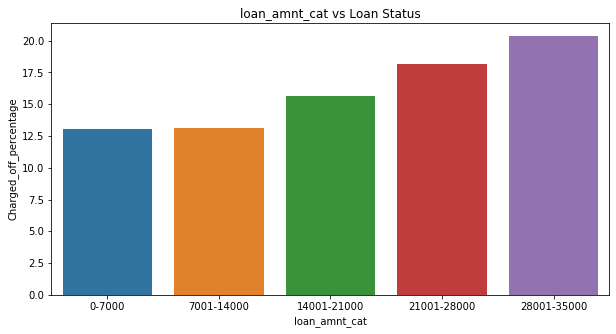

In [21]:
bivariate('loan_amnt_cat')

#### Observation :
From the above analysis and plot it can be observed that the percentage of defaulters are highest for the loan amounts in the range 28k-35k. Also it can be observed that as the loan amount increases the percentage of defaulters are increasing.

In [22]:
data.groupby(['loan_status'])['funded_amnt'].describe().reset_index()

loan_status    count          mean          std     min      25%      50%  \
0  Charged Off   5627.0  11753.398792  7760.516335   900.0   5575.0  10000.0   
1      Current   1140.0  16485.701754  8183.567669  1000.0  11575.0  15225.0   
2   Fully Paid  32950.0  10618.520486  6956.047888   500.0   5050.0   9200.0   

        75%      max  
0  16000.00  35000.0  
1  21281.25  35000.0  
2  14500.00  35000.0

In [23]:
data.hvplot.hist(y='funded_amnt',by='loan_status',bins=50,alpha=0.5,title="FundedAmount vs LoanStatus",xlabel='FundedAmount',
                 ylabel='LoanStatus')

:NdOverlay   [loan_status]
   :Histogram   [funded_amnt]   (funded_amnt_count)

In [24]:
data.groupby(['loan_status'])['funded_amnt_inv'].describe().reset_index()

loan_status    count          mean          std     min           25%  \
0  Charged Off   5627.0  10864.521324  7661.750540     0.0   5000.000000   
1      Current   1140.0  16318.265247  8087.613125  1000.0  11268.803065   
2   Fully Paid  32950.0  10112.837414  6901.840874     0.0   5000.000000   

            50%      75%      max  
0   9401.209477  15000.0  35000.0  
1  15000.000000  21050.0  35000.0  
2   8500.000000  13950.0  35000.0

In [25]:
data.hvplot.hist(y='funded_amnt_inv',by='loan_status',bins=50,alpha=0.5,title="FundedAmountInv vs LoanStatus",
                 xlabel='FundedAmountInv',ylabel='LoanStatus')

:NdOverlay   [loan_status]
   :Histogram   [funded_amnt_inv]   (funded_amnt_inv_count)

#### Observation :
From the above 3 plots for loan_amnt, funded_amnt and funded_amnt_inv, it can be observed that the distribution is similar for all the 3 columns. So lets find if there is corelation between these columns.

In [26]:
temp=data[['loan_amnt','funded_amnt','funded_amnt_inv']]
temp.corr()

loan_amnt  funded_amnt  funded_amnt_inv
loan_amnt         1.000000     0.981578         0.940034
funded_amnt       0.981578     1.000000         0.958422
funded_amnt_inv   0.940034     0.958422         1.000000

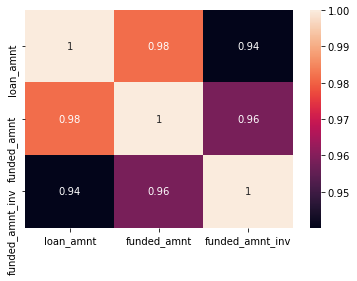

In [27]:
sns.heatmap(temp.corr(),annot=True)
plt.show()

#### Observation : 
There is high degree of corelation between the 3 columns, So drop the columns funded_amnt, funded_amnt_inv

In [28]:
data.drop(['funded_amnt','funded_amnt_inv'],axis=1,inplace=True)

In [29]:
data.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

#### Lets try to understand if there is correlation between total_pymnt, total_pymnt_inv, total_rec_prncp and total_rec_int

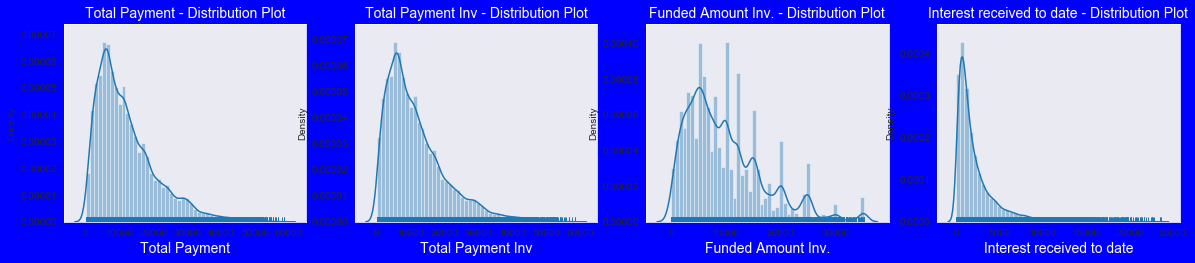

In [30]:
plt.figure(figsize=(20,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 4, 1)
ax = sns.distplot(data['total_pymnt'],rug = True)
ax.set_title('Total Payment - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Total Payment',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 4, 2)
ax = sns.distplot(data['total_pymnt_inv'],rug = True)
ax.set_title('Total Payment Inv - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Total Payment Inv',fontsize=14,color='w')
# subplot 3
plt.subplot(2, 4, 3)
ax = sns.distplot(data['total_rec_prncp'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
# subplot 4
plt.subplot(2, 4, 4)
ax = sns.distplot(data['total_rec_int'],rug = True)
ax.set_title('Interest received to date - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Interest received to date',fontsize=14,color='w')
plt.show()

#### Observation :
The distribution looks almost similar for all these columns. Now plot the correlation matrix, to find the degree of correlation between these columns.

In [31]:
total_payment=data[['total_pymnt','total_pymnt_inv', 'total_rec_prncp', 'total_rec_int']]

In [32]:
total_payment.corr()

total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int
total_pymnt         1.000000         0.970815         0.971472       0.828758
total_pymnt_inv     0.970815         1.000000         0.939581       0.815615
total_rec_prncp     0.971472         0.939581         1.000000       0.684027
total_rec_int       0.828758         0.815615         0.684027       1.000000

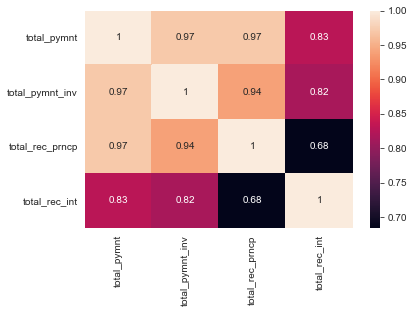

In [33]:
sns.heatmap(total_payment.corr(),annot=True)
plt.show()

#### There is high correlation between total_pymnt, total_pymnt_inv, total_rec_prncp and total_rec_int. So drop the columns total_pymnt_inv, total_rec_prncp and total_rec_int.

In [34]:
data.collection_recovery_fee.describe()

count    39717.000000
mean        12.406112
std        148.671593
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7002.190000
Name: collection_recovery_fee, dtype: float64

#### Observation : 
Most of the values in collection_recovery_fee are '0'. So drop the column collection_recovery_fee

In [35]:
data.drop(['total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','collection_recovery_fee'],axis=1,inplace=True)

#### Univariate Analysis for Interest Rate

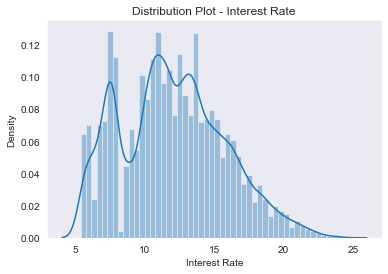

In [36]:
sns.distplot(data['int_rate'])
plt.title('Distribution Plot - Interest Rate')
plt.xlabel('Interest Rate')
plt.show()

In [37]:
data.hvplot.hist(y='int_rate',by='loan_status',alpha=0.5)

:NdOverlay   [loan_status]
   :Histogram   [int_rate]   (int_rate_count)

#### Observation : 
Most of the loans has interest rates in the range of 10-15%

loan_status int_rate_cat  Charged Off  Current  Fully Paid  Total  \
3                   16 +         1266      359        3372   4997   
2                12.6-16         2003      332        9470  11805   
1              10.1-12.5         1232      270        8148   9650   
0                   0-10          830       77       11486  12393   

loan_status  Charged_off_percentage  
3                             25.34  
2                             16.97  
1                             12.77  
0                              6.70

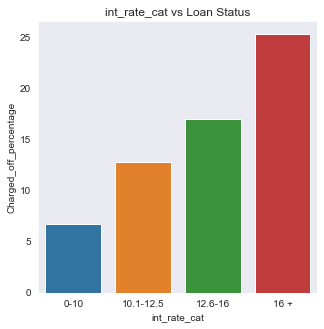

In [38]:
bivariate('int_rate_cat',5,5)

#### Observation :
1. Higher interest rate increases the percentage of defaulters.
2. Defaulters percentage is highest for interest rates > 16%

#### Univariate Analysis of Annual Income

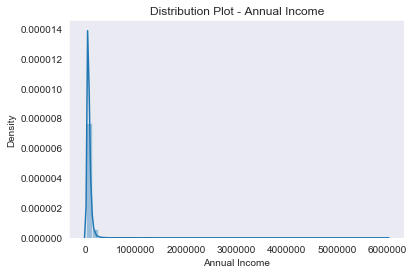

In [39]:
sns.distplot(data['annual_inc'])
plt.title('Distribution Plot - Annual Income')
plt.xlabel('Annual Income')
plt.show()

# lets consider the annual income <= 250000

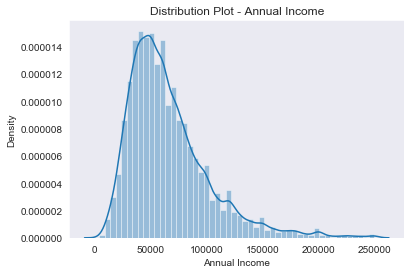

In [40]:
Annual_income=data[data.annual_inc<=250000]
sns.distplot(Annual_income.annual_inc)
plt.title('Distribution Plot - Annual Income')
plt.xlabel('Annual Income')
plt.show()

In [41]:
data[data.annual_inc<=250000].hvplot.hist(y='annual_inc',by='loan_status',alpha=0.5,bins=50)

:NdOverlay   [loan_status]
   :Histogram   [annual_inc]   (annual_inc_count)

#### Annual income is in range of 40k - 80k for most of the borrowers

loan_status annual_inc_cat  Charged Off  Current  Fully Paid  Total  \
0                  0-20000          237        9         943   1189   
1              20000-40000         1514      170        7004   8688   
2              40000-60000         1729      345        9534  11608   
3              60000-80000         1024      240        6597   7861   
4                  80000 +         1122      376        8859  10357   

loan_status  Charged_off_percentage  
0                             19.93  
1                             17.43  
2                             14.89  
3                             13.03  
4                             10.83

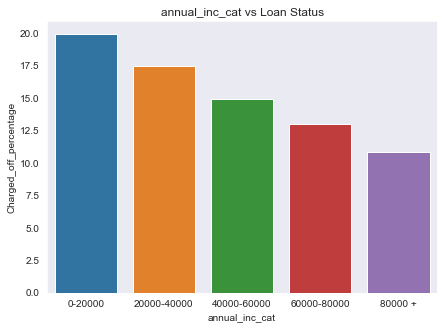

In [42]:
bivariate('annual_inc_cat',7,5)

#### Observation:
1. Percentage of defaulters is highest in Lower income range.
2. 0-20k income range has highest defaulters

#### Analysis of 'loan_status' wrt 'Term'

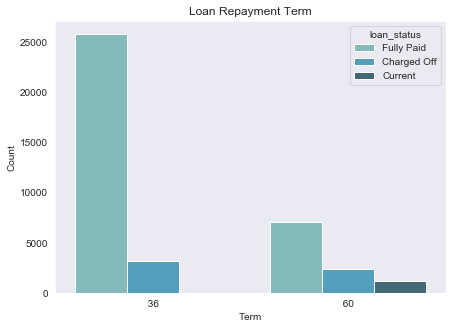

In [43]:
plt.figure(figsize=(7,5))
sns.countplot(x='term',hue='loan_status',data=data,palette='GnBu_d')
plt.title("Loan Repayment Term")
plt.xlabel("Term")
plt.ylabel("Count")
plt.show()

#### Observation:
From the above plot it can be observed that, borrowers with term of 60 months have more chances to be 'defaulters'

#### Analysis of loan status wrt purpose of loan

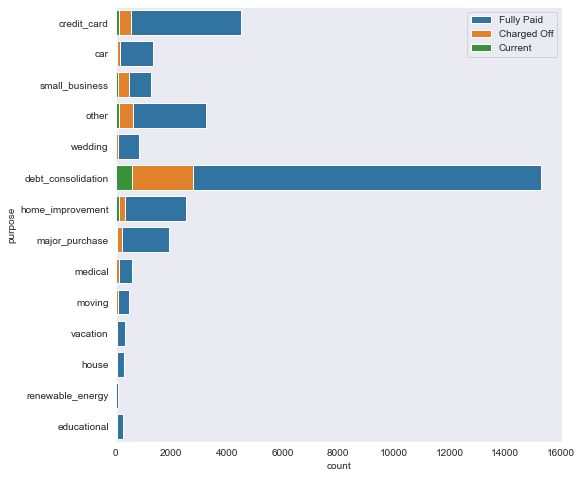

In [44]:
plt.figure(figsize=(8,8))
ax=sns.countplot(y='purpose',hue='loan_status',data=data,dodge=False)
ax.legend(bbox_to_anchor=(1,1))
plt.show()

#### Observation:
Most of the loans are taken for debt_consolidation and credit_card.

loan_status             purpose  Charged Off  Current  Fully Paid    Total  \
11               small_business        475.0     74.0      1279.0   1828.0   
10             renewable_energy         19.0      1.0        83.0    103.0   
3                   educational         56.0      0.0       269.0    325.0   
9                         other        633.0    128.0      3232.0   3993.0   
8                        moving         92.0      7.0       484.0    583.0   
5                         house         59.0     14.0       308.0    381.0   
7                       medical        106.0     12.0       575.0    693.0   
2            debt_consolidation       2767.0    586.0     15288.0  18641.0   
12                     vacation         53.0      6.0       322.0    381.0   
4              home_improvement        347.0    101.0      2528.0   2976.0   
1                   credit_card        542.0    103.0      4485.0   5130.0   
0                           car        160.0     50.0      1339.0   1549.0   
6                major_purchase        222.0     37.0      1928.0   2187.0   
13                      wedding         96.0     21.0       830.0    947.0   

loan_status  Charged_off_percentage  
11                            25.98  
10                            18.45  
3                             17.23  
9                             15.85  
8                             15.78  
5                             15.49  
7                             15.30  
2                             14.84  
12                            13.91  
4                             11.66  
1                             10.57  
0                             10.33  
6                             10.15  
13                            10.14

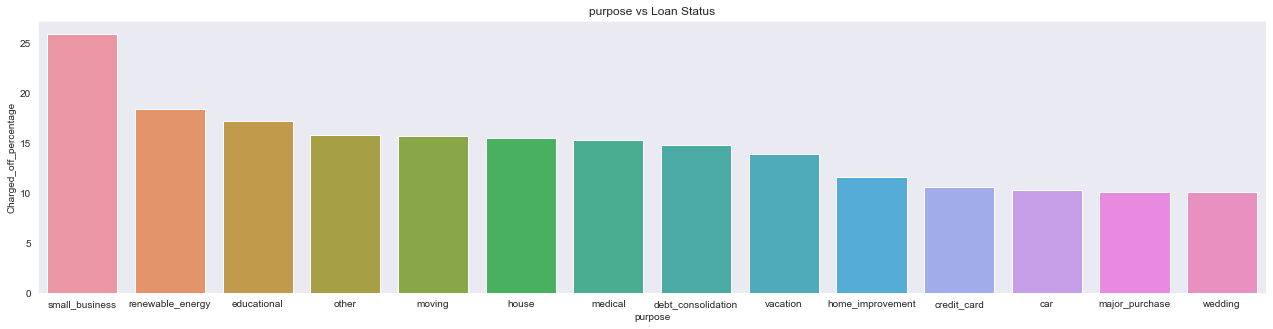

In [45]:
bivariate('purpose',22,5)

#### Observation :
1. Borrowers who took loan for 'small_business' end up becoming defaulters.

#### Analysis of loan status wrt the home ownership

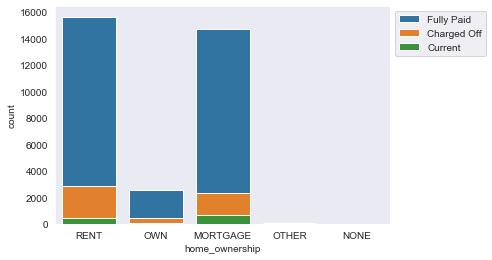

In [46]:
ax=sns.countplot(x='home_ownership',hue='loan_status',data=data,dodge=False)
ax.legend(bbox_to_anchor=(1,1))
plt.show()

loan_status home_ownership  Charged Off  Current  Fully Paid    Total  \
2                    OTHER         18.0      0.0        80.0     98.0   
4                     RENT       2839.0    419.0     15641.0  18899.0   
3                      OWN        443.0     83.0      2532.0   3058.0   
0                 MORTGAGE       2327.0    638.0     14694.0  17659.0   
1                     NONE          0.0      0.0         3.0      3.0   

loan_status  Charged_off_percentage  
2                             18.37  
4                             15.02  
3                             14.49  
0                             13.18  
1                              0.00

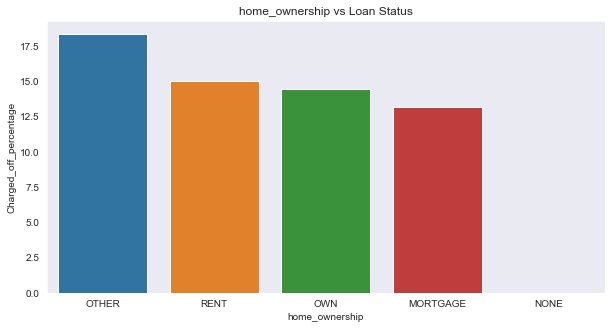

In [47]:
bivariate('home_ownership')

Observation :
1. Though the defaulter percentage is highest for home_ownership 'others', the data for 'other' is not enough to conclude on this.
2. So among home_ownership of 'rent','own','Mortgage', Borrowers who live in rented house has highest defaulters percentage

#### Analysis of loan status wrt verification status

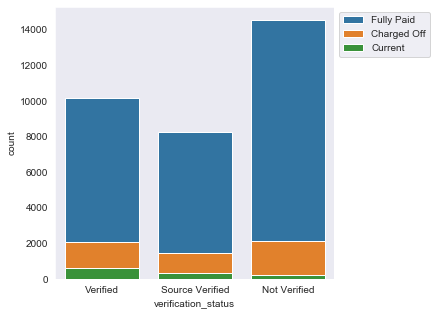

In [48]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='verification_status',hue='loan_status',data=data,dodge=False)
ax.legend(bbox_to_anchor=(1,1))
plt.show()

loan_status verification_status  Charged Off  Current  Fully Paid  Total  \
2                      Verified         2051      603       10155  12809   
1               Source Verified         1434      310        8243   9987   
0                  Not Verified         2142      227       14552  16921   

loan_status  Charged_off_percentage  
2                             16.01  
1                             14.36  
0                             12.66

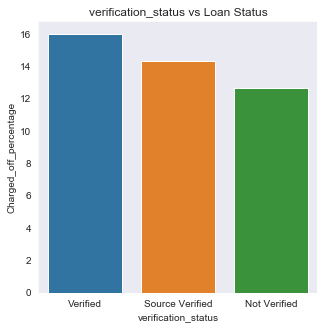

In [49]:
bivariate('verification_status',5,5)

#### Observation :
1. There is not much effect of different verification status on whether the borrower will be defaulter. But for the verification status is 'verified' there is higher percentage of defaulters

### Analysis of loan status wrt Total employment years

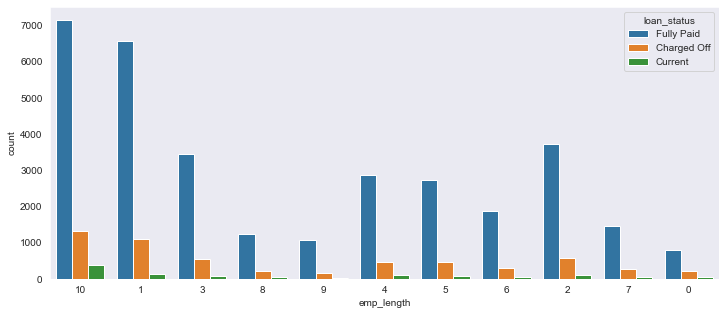

In [50]:
plt.figure(figsize=(12,5))
sns.countplot(x='emp_length',hue='loan_status',data=data)
plt.show()

#### Observation :
People with 10+ years of experience have taken most number of loans

loan_status emp_length  Charged Off  Current  Fully Paid  Total  \
0                    0          228       42         805   1075   
2                   10         1331      391        7157   8879   
8                    7          263       62        1448   1773   
1                    1         1095      146        6582   7823   
6                    5          458       88        2736   3282   
7                    6          307       61        1861   2229   
9                    8          203       44        1232   1479   
4                    3          555       83        3457   4095   
5                    4          462       94        2880   3436   
3                    2          567       97        3724   4388   
10                   9          158       32        1068   1258   

loan_status  Charged_off_percentage  
0                             21.21  
2                             14.99  
8                             14.83  
1                             14.00  
6                             13.95  
7                             13.77  
9                             13.73  
4                             13.55  
5                             13.45  
3                             12.92  
10                            12.56

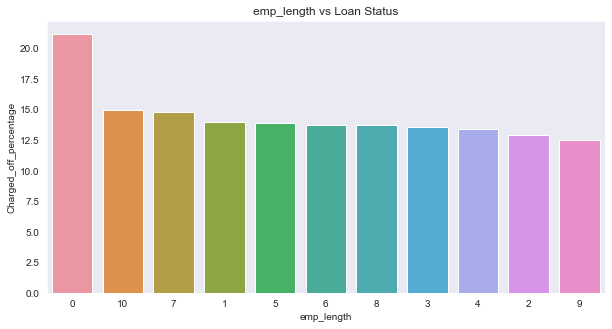

In [51]:
bivariate('emp_length')

#### Observation :
1. People with '0' years of experience are the most defaulters.
2. This is expected because their income will be very low resulting in becoming defaulters.

### Analysis of Employment type
Since there huge number of Employment types, here only top 30 jobs are considered

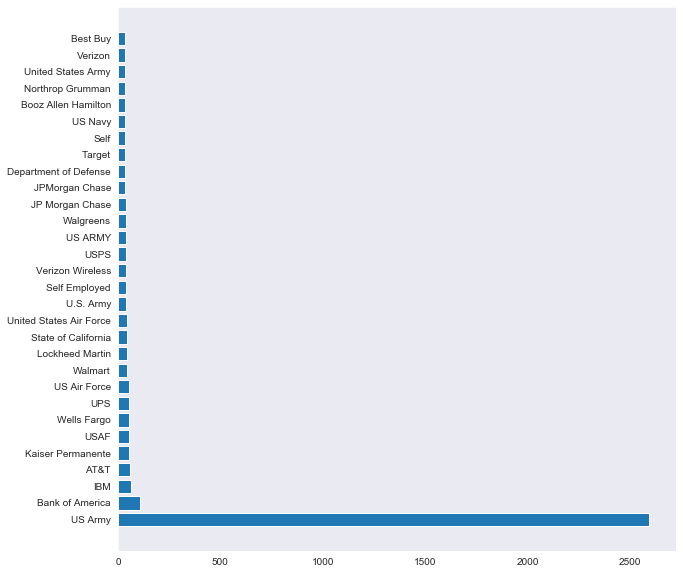

In [52]:
plt.figure(figsize=(10,10))
plt.barh(data.emp_title.value_counts()[:30].index,data.emp_title.value_counts()[:30])
plt.show()

#### Observation:
1. Most number of loans are taken by the borrowers who are employed by "US Army" followed by 'Bank of Baroda"

### Analysis of loan issue date

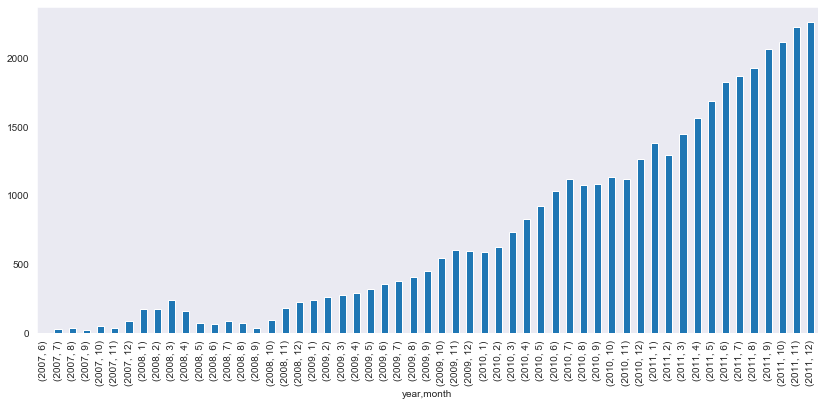

In [53]:
plt.figure(figsize=(14,6))
data.groupby(['year','month']).id.count().plot(kind='bar')
plt.show()

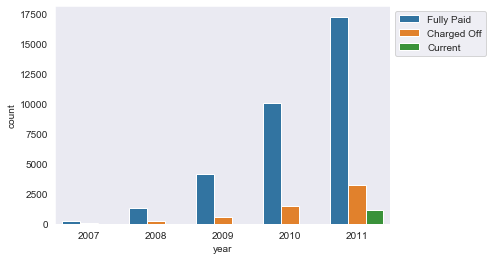

In [54]:
ax=sns.countplot(x='year',hue='loan_status',data=data)
ax.legend(bbox_to_anchor=(1,1))
plt.show()

#### Observation :
1. It can be observed that the number of borrowers are increasing year by year.
2. There is a dip in borrowers count in the year 2008 after March. This maybe because of the Global Recession in the same year.

### Analysis of loan status wrt Loan Grade

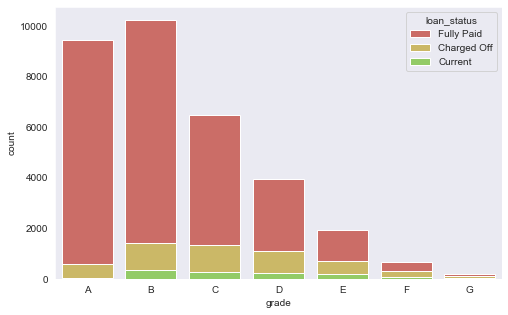

In [55]:
order=['A','B','C','D','E','F','G']
plt.figure(figsize=(8,5))
color=sns.color_palette("hls", 8)
sns.countplot(x='grade',hue='loan_status',data=data,dodge=False,palette=color,order=order)
plt.show()

#### Observation:
1. Most number of loans offered in 'B' grade followed by 'A' grade.

loan_status grade  Charged Off  Current  Fully Paid  Total  \
6               G          101       17         198    316   
5               F          319       73         657   1049   
4               E          715      179        1948   2842   
3               D         1118      222        3967   5307   
2               C         1347      264        6487   8098   
1               B         1425      345       10250  12020   
0               A          602       40        9443  10085   

loan_status  Charged_off_percentage  
6                             31.96  
5                             30.41  
4                             25.16  
3                             21.07  
2                             16.63  
1                             11.86  
0                              5.97

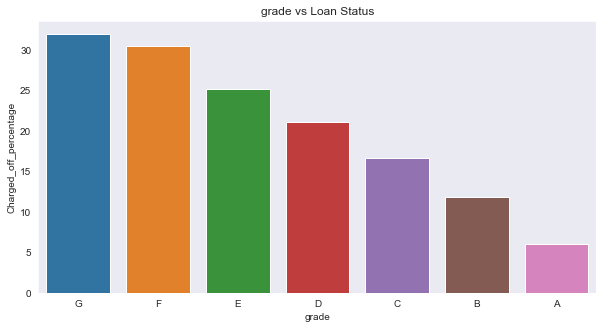

In [56]:
bivariate('grade')

#### Observation : 
1. Highest percentage of defaulters are observed for loan grade 'G' followed by 'F'. But the total number of loans offered in these grades are least.
2. Least percentage of deafulters are observed for borrowers receiving loans in grade 'A' followed by 'B'. But the total number of loans offered in these grades are highest.

### Analysis of loan status wrt sub_grades of loan

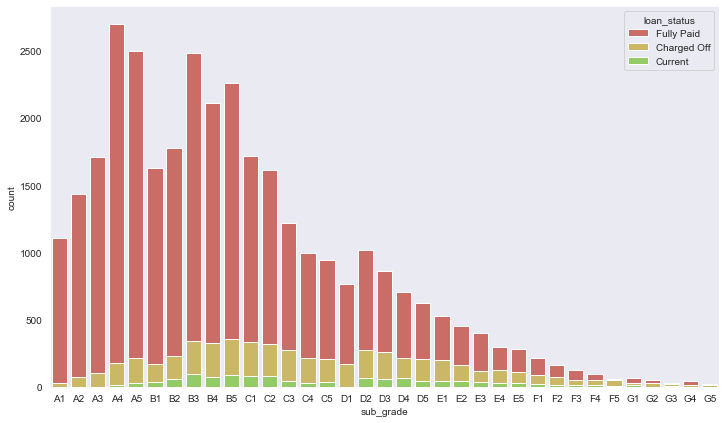

In [57]:
plt.figure(figsize=(12,7))
color=sns.color_palette("hls", 8)
order=['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5']
sns.countplot(x='sub_grade',hue='loan_status',data=data,dodge=False,palette=color,order=order)
plt.show()

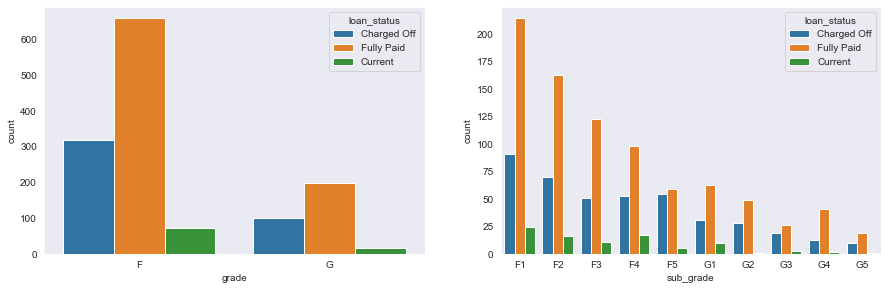

In [58]:
plt.figure(figsize=(15, 10))
FandG=data[(data.grade=='F') | (data.grade=='G')]
order=sorted(FandG.grade.unique().tolist())
plt.subplot(2,2,1)
sns.countplot(x='grade',hue='loan_status',data=FandG,order=order)
suborder=sorted(FandG.sub_grade.unique().tolist())
plt.subplot(2,2,2)
sns.countplot(x='sub_grade',hue='loan_status',data=FandG,order=suborder)
plt.show()

loan_status sub_grade  Charged Off  Current  Fully Paid   Total  \
29                 F5         54.0      5.0        59.0   118.0   
32                 G3         19.0      3.0        26.0    48.0   
31                 G2         28.0      1.0        49.0    78.0   
34                 G5         10.0      1.0        19.0    30.0   
28                 F4         53.0     17.0        98.0   168.0   
30                 G1         31.0     10.0        63.0   104.0   
26                 F2         70.0     16.0       163.0   249.0   
23                 E4        126.0     30.0       298.0   454.0   
25                 F1         91.0     24.0       214.0   329.0   
27                 F3         51.0     11.0       123.0   185.0   
24                 E5        109.0     29.0       278.0   416.0   
20                 E1        198.0     41.0       524.0   763.0   
21                 E2        163.0     42.0       451.0   656.0   
19                 D5        209.0     40.0       625.0   874.0   
33                 G4         13.0      2.0        41.0    56.0   
18                 D4        215.0     63.0       703.0   981.0   
17                 D3        256.0     57.0       860.0  1173.0   
22                 E3        119.0     37.0       397.0   553.0   
16                 D2        271.0     62.0      1015.0  1348.0   
15                 D1        167.0      0.0       764.0   931.0   
12                 C3        270.0     41.0      1218.0  1529.0   
14                 C5        208.0     32.0       946.0  1186.0   
13                 C4        212.0     30.0       994.0  1236.0   
11                 C2        321.0     80.0      1610.0  2011.0   
10                 C1        336.0     81.0      1719.0  2136.0   
9                  B5        356.0     89.0      2259.0  2704.0   
8                  B4        329.0     75.0      2108.0  2512.0   
7                  B3        341.0     92.0      2484.0  2917.0   
6                  B2        228.0     56.0      1773.0  2057.0   
5                  B1        171.0     33.0      1626.0  1830.0   
4                  A5        217.0     27.0      2498.0  2742.0   
3                  A4        178.0     13.0      2695.0  2886.0   
2                  A3        103.0      0.0      1707.0  1810.0   
1                  A2         74.0      0.0      1434.0  1508.0   
0                  A1         30.0      0.0      1109.0  1139.0   

loan_status  Charged_off_percentage  
29                            45.76  
32                            39.58  
31                            35.90  
34                            33.33  
28                            31.55  
30                            29.81  
26                            28.11  
23                            27.75  
25                            27.66  
27                            27.57  
24                            26.20  
20                            25.95  
21                            24.85  
19                            23.91  
33                            23.21  
18                            21.92  
17                            21.82  
22                            21.52  
16                            20.10  
15                            17.94  
12                            17.66  
14                            17.54  
13                            17.15  
11                            15.96  
10                            15.73  
9                             13.17  
8                             13.10  
7                             11.69  
6                             11.08  
5                              9.34  
4                              7.91  
3                              6.17  
2                              5.69  
1                              4.91  
0                              2.63

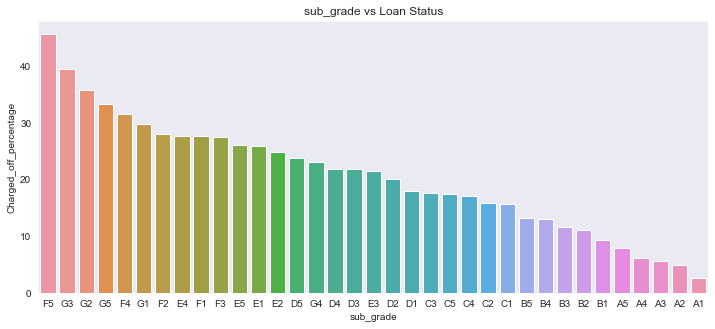

In [59]:
bivariate('sub_grade',12,5)

#### Observation :
1. Chargedoff Percentage is highest for sub grades of 'F' specifically sub_Grade F5 followed by G3.
2. Chargedoff percentage is least for sub grades of A specifically subgrade A1 followed A2.

#### Analysis of pub_rec_bankruptcies (Number of public record bankruptcies)

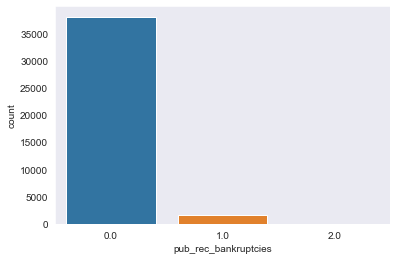

In [60]:
sns.countplot(data.pub_rec_bankruptcies)
plt.show()

#### Observation : 
More number of borrowers have "Number of public record bankruptcies" as '0'. This is as expected. Because borrowers who have record of previous bankruptcies should not be given loan.

loan_status  pub_rec_bankruptcies  Charged Off  Current  Fully Paid  Total  \
2                             2.0            2        2           3      7   
1                             1.0          366       37        1271   1674   
0                             0.0         5259     1101       31676  38036   

loan_status  Charged_off_percentage  
2                             28.57  
1                             21.86  
0                             13.83

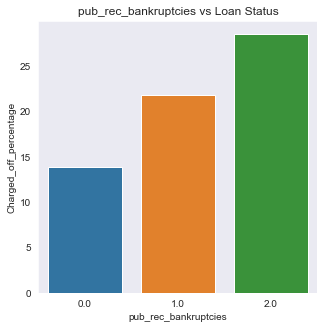

In [61]:
bivariate('pub_rec_bankruptcies',5,5)

#### Observation : 
1. As expected, the defaulters percentage is highest for pub_rec_bankruptcies=2, followed by pub_rec_bankruptcies=1.
2. Even though the loan application count for pub_rec_bankruptcies=0 is more, the defaulter percentage is less.

#### Analysis of pub_rec (Number of derogatory public records)

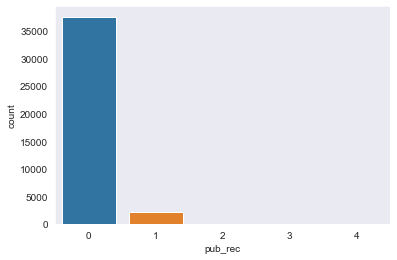

In [62]:
sns.countplot(data.pub_rec)
plt.show()

#### Observation : 
1. Borrowers with no derogatory public records are given more loans.

loan_status  pub_rec  Charged Off  Current  Fully Paid    Total  \
1                  1        457.0     43.0      1556.0   2056.0   
2                  2         10.0      3.0        38.0     51.0   
0                  0       5160.0   1094.0     31347.0  37601.0   
3                  3          0.0      0.0         7.0      7.0   
4                  4          0.0      0.0         2.0      2.0   

loan_status  Charged_off_percentage  
1                             22.23  
2                             19.61  
0                             13.72  
3                              0.00  
4                              0.00

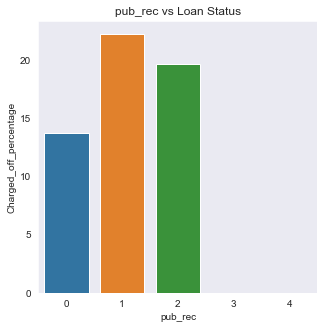

In [63]:
bivariate('pub_rec',5,5)

#### Observation : 
1. As expected, the defaulters percentage is highest for pub_rec=1, followed by pub_rec=2.
2. Even though the loan application count for pub_rec=0 is more, the defaulter percentage is less.

#### Analysis of dti (Debt-to-income ratio)
Debt income ratio is the percentage of a consumer's monthly gross income that goes toward paying debts.

So now let us try to understand the correlation between annual income and dti.

In [64]:
dti_anninc=data[['dti','annual_inc']]

In [65]:
dti_anninc.corr()

dti  annual_inc
dti         1.000000   -0.122732
annual_inc -0.122732    1.000000

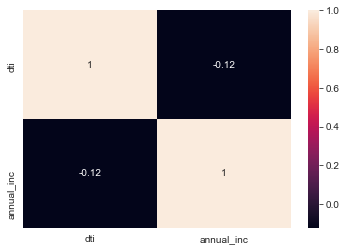

In [66]:
sns.heatmap(dti_anninc.corr(),annot=True)
plt.show()

#### Observation : 
1. Annual income and DTI(Debt-to-income ratio) are negatively correlated.
2. That means when annual income is low DTI is high & vice versa.

In [67]:
data.hvplot.hist(y='dti', bins=50, title="dti Distribution", xlabel='dti', ylabel='Count')

:Histogram   [dti]   (dti_count)

#### Observation : 
Most of the loan borrowers have dti in the range of 5-25

loan_status dti_cat  Charged Off  Current  Fully Paid  Total  \
4               20+         1118      237        5460   6815   
3             16-20         1389      284        7422   9095   
2             11-15         1402      269        8228   9899   
1              6-10         1005      199        6868   8072   
0               0-5          597       93        4287   4977   

loan_status  Charged_off_percentage  
4                             16.40  
3                             15.27  
2                             14.16  
1                             12.45  
0                             12.00

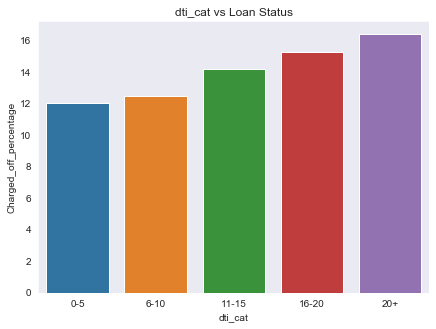

In [68]:
bivariate('dti_cat',7,5)

#### Observation : 
1. The percentage of defaulters is highest for Debt-to-Income-ratio in the 20+ range.
2. Higher the value of 'dti' implies the annual income is low and hence the possibility of defaulting increases.

#### Analysis of revol_bal (Total credit revolving balance)

loan_status  revol_bal_cat  Charged Off  Current  Fully Paid  Total  \
0                  0-50000         5307     1072       30994  37373   
1             50001-100000          140       40         953   1133   
2            100001-150000           22        6         189    217   

loan_status  Charged_off_percentage  
0                             14.20  
1                             12.36  
2                             10.14

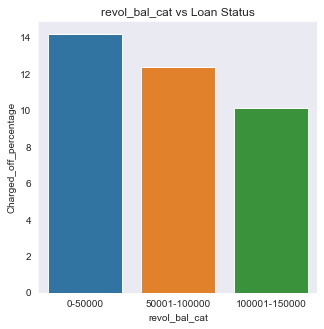

In [69]:
bivariate('revol_bal_cat',5,5)

#### Observation :
1. Lower the "Total credit revolving balance", higher the possibility of defaulting.

#### Analysis of delinq_2yrs (The number of 30+ days past-due incidences of delinquency)

loan_status  delinq_2yrs  Charged Off  Current  Fully Paid    Total  \
8                      8          1.0      0.0         1.0      2.0   
7                      7          1.0      0.0         3.0      4.0   
4                      4         13.0      2.0        47.0     62.0   
2                      2        130.0     14.0       543.0    687.0   
3                      3         35.0      8.0       177.0    220.0   
1                      1        507.0     96.0      2700.0   3303.0   
0                      0       4936.0   1019.0     29450.0  35405.0   
5                      5          3.0      1.0        18.0     22.0   
6                      6          1.0      0.0         9.0     10.0   
9                      9          0.0      0.0         1.0      1.0   
10                    11          0.0      0.0         1.0      1.0   

loan_status  Charged_off_percentage  
8                             50.00  
7                             25.00  
4                             20.97  
2                             18.92  
3                             15.91  
1                             15.35  
0                             13.94  
5                             13.64  
6                             10.00  
9                              0.00  
10                             0.00

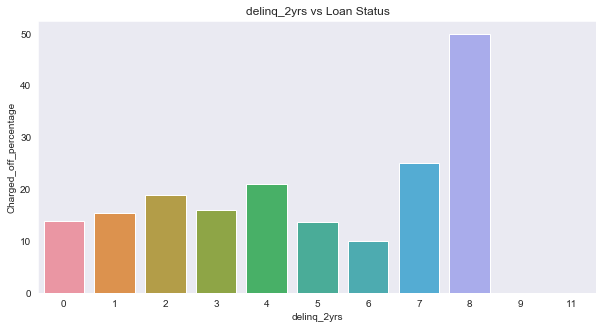

In [70]:
bivariate('delinq_2yrs')

#### Observation : 
The highest defaulting percentage is observed for delinq_2yrs=8, indicating the The number of 30+ days past-due incidences of delinquency is 8 in last 2 years by the borrower.

#### Analysis of revol_util (Revolving line utilization rate)

loan_status revol_util_cat  Charged Off  Current  Fully Paid  Total  \
3                      75+         1664      281        6898   8843   
2                    51-75         1656      362        8620  10638   
1                    26-50         1333      295        8766  10394   
0                     0-25          814      179        7822   8815   

loan_status  Charged_off_percentage  
3                             18.82  
2                             15.57  
1                             12.82  
0                              9.23

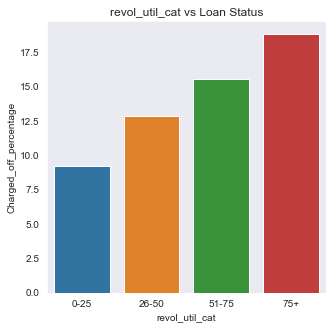

In [71]:
bivariate('revol_util_cat',5,5)

#### Observation:
1. Higher the Revolving line utilization rate, higher the possibility of defaulting percentage.
2. Highest faulting percentage is observed for Revolving line utilization rate > 75%

#### Analysis of "Paid_Percentage"

loan_status     Paid_Percentage  Charged Off  Current  Fully Paid  Total  \
0            Chargedoff/Current         4839       53        1185   6077   
1                     FullyPaid          772     1087       31765  33624   

loan_status  Charged_off_percentage  
0                             79.63  
1                              2.30

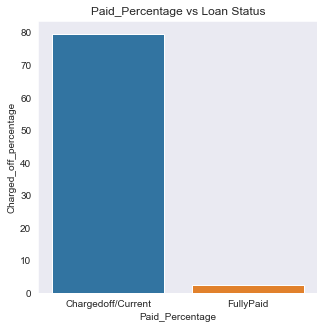

In [72]:
bivariate('Paid_Percentage',5,5)

#### Observation:
Highest ChargedOff Percentage is observed for Paid_percentage < 100%

#### Analysing which state has highest ChargedOff Percentage

Calculating the ChargedOff percentage for each state.

In [73]:
state_vs_loan = data.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['Total'] = state_vs_loan['Charged Off'] + state_vs_loan['Current'] + state_vs_loan['Fully Paid'] 
state_vs_loan['Chargedoff_Percentage'] = state_vs_loan['Charged Off'] / state_vs_loan['Total']
state_vs_loan.sort_values('Chargedoff_Percentage',ascending=False)

loan_status addr_state  Charged Off  Current  Fully Paid   Total  \
28                  NE          3.0      0.0         2.0     5.0   
32                  NV        108.0     18.0       371.0   497.0   
0                   AK         15.0      2.0        63.0    80.0   
40                  SD         12.0      2.0        50.0    64.0   
9                   FL        504.0     85.0      2277.0  2866.0   
13                  ID          1.0      0.0         5.0     6.0   
24                  MO        114.0     16.0       556.0   686.0   
11                  HI         28.0      8.0       138.0   174.0   
31                  NM         30.0      6.0       153.0   189.0   
4                   CA       1125.0    150.0      5824.0  7099.0   
36                  OR         71.0     16.0       364.0   451.0   
43                  UT         40.0      6.0       212.0   258.0   
20                  MD        162.0     26.0       861.0  1049.0   
10                  GA        215.0     39.0      1144.0  1398.0   
46                  WA        127.0     22.0       691.0   840.0   
30                  NJ        278.0     60.0      1512.0  1850.0   
29                  NH         25.0      5.0       141.0   171.0   
27                  NC        114.0     38.0       636.0   788.0   
22                  MI        103.0     16.0       601.0   720.0   
3                   AZ        123.0     30.0       726.0   879.0   
39                  SC         66.0     13.0       393.0   472.0   
17                  KY         45.0     14.0       266.0   325.0   
47                  WI         63.0     20.0       377.0   460.0   
35                  OK         40.0     12.0       247.0   299.0   
23                  MN         81.0     10.0       524.0   615.0   
33                  NY        495.0    114.0      3203.0  3812.0   
26                  MT         11.0      2.0        72.0    85.0   
14                  IL        197.0     47.0      1281.0  1525.0   
34                  OH        155.0     45.0      1023.0  1223.0   
38                  RI         25.0      4.0       169.0   198.0   
44                  VA        177.0     38.0      1192.0  1407.0   
6                   CT         94.0     25.0       632.0   751.0   
5                   CO         98.0     26.0       668.0   792.0   
18                  LA         53.0      9.0       374.0   436.0   
1                   AL         54.0     17.0       381.0   452.0   
19                  MA        159.0     43.0      1138.0  1340.0   
37                  PA        180.0     49.0      1288.0  1517.0   
48                  WV         21.0      5.0       151.0   177.0   
41                  TN          2.0      0.0        15.0    17.0   
42                  TX        316.0     68.0      2343.0  2727.0   
16                  KS         31.0     16.0       224.0   271.0   
45                  VT          6.0      1.0        47.0    54.0   
2                   AR         27.0     10.0       208.0   245.0   
25                  MS          2.0      0.0        17.0    19.0   
8                   DE         12.0      1.0       101.0   114.0   
7                   DC         15.0      3.0       196.0   214.0   
49                  WY          4.0      3.0        76.0    83.0   
21                  ME          0.0      0.0         3.0     3.0   
15                  IN          0.0      0.0         9.0     9.0   
12                  IA          0.0      0.0         5.0     5.0   

loan_status  Chargedoff_Percentage  
28                        0.600000  
32                        0.217304  
0                         0.187500  
40                        0.187500  
9                         0.175855  
13                        0.166667  
24                        0.166181  
11                        0.160920  
31                        0.158730  
4                         0.158473  
36                        0.157428  
43                        0.155039  
20                        0.154433  
10           

#### Observation :
1. Highest defaulter percentage is observed in state 'NE'. But the data from this state is insufficient to come to a conclusion.
2. Next highest defaulter percentage is observed in state 'NV'.

Now let us plot the ChargedOff Percentage of each state.

In [74]:
import chart_studio.plotly as py
import plotly.offline as po
import plotly.graph_objs as pg
po.init_notebook_mode(connected = True)

In [75]:
data['text']= data['addr_state'] + '<br>' +\
                    'Chargedoff_Percentage: ' + round(100*(state_vs_loan['Chargedoff_Percentage']),2).astype(str)

data1 =  dict(
        type='choropleth',
        colorscale = 'Reds',
        autocolorscale = False,
        locations=data['addr_state'].unique(), 
        locationmode = 'USA-states',
        text=data['text'],
        z = round(state_vs_loan['Chargedoff_Percentage'],2),
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "%")
        )


layout = dict(
    title = 'Lending Club : Charged Off percentage for each State in USA',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data1, layout=layout)
po.iplot(fig, filename='d3-cloropleth-map')

#### Observation:
1. Highest defaulter percentage is observed in state 'NE'.
2. Next highest defaulter percentage is observed in state 'NV'.